## 환경 설정 1

In [1]:
!pip install magenta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 210 kB 7.2 MB/s 
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 69 kB 6.6 MB/s 
     |████████████████████████████████| 5.6 MB 27.8 MB/s 
     |████████████████████████████████| 352 kB 51.3 MB/s 
     |████████████████████████████████| 6.5 MB 38.6 MB/s 
     |████████████████████████████████| 2.3 MB 49.7 MB/s 
     |████████████████████████████████| 90 kB 6.2 MB/s 
     |████████████████████████████████| 3.4 MB 37.9 MB/s 
     |████████████████████████████████| 254 kB 38.4 MB/s 
     |████████████████████████████████| 204 kB 45.6 MB/s 
     |████████████████████████████████| 11.2 MB 39.0 MB/s 
     |████████████████████████████████| 3.6 MB 39.3 MB/s 
     |████████████████████████████████| 13.5 MB 37.5 MB/s 
     |████████████████████████████

In [2]:
!sudo apt-get install build-essential libasound2-dev libjack-dev portaudio19-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
libjack-dev is already the newest version (1:0.125.0-3).
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1

## Google mount를 통한 파일 clone

In [3]:
from google.colab import drive

drive.mount("/drive")

Mounted at /drive


In [ ]:
cd /drive/MyDrive/pozalabs

/drive/MyDrive/pozalabs


In [ ]:
!git clone https://github.com/magenta/magenta.git

Cloning into 'magenta'...
remote: Enumerating objects: 15910, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 15910 (delta 24), reused 45 (delta 15), pack-reused 15847
Receiving objects: 100% (15910/15910), 36.44 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (12080/12080), done.
Checking out files: 100% (491/491), done.


In [4]:
cd /drive/MyDrive/pozalabs/magenta

/drive/MyDrive/pozalabs/magenta


## 환경 설정 2

In [5]:
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///drive/MyDrive/pozalabs/magenta
  Attempting uninstall: magenta
    Found existing installation: magenta 2.1.4
    Uninstalling magenta-2.1.4:
      Successfully uninstalled magenta-2.1.4
  Running setup.py develop for magenta


## Data 전처리

**1️⃣  제공된 파일을 다운로드 한 후, 직접 구글 드라이브에 저장**

**2️⃣ 데이터파일을 이용하여 TFRecord 파일 생성 (데이터 확인 시, .mid & .wav 파일 두개 존재) -> wav 파일은 변환이 안되는 것으로 확인**
  - midi file이란? 
      - 각 악기들이 언제 연주해야하는지에 관한 정보가 나와있는 file
      - 실제 오디오 콘텐츠를 전달하지 않는다는 점에서 WAV 또는 MP3 와 같은 일반 오디오 파일과의 차이

> info.csv라는 파일을 이용하여 데이터 확인

In [7]:
import pandas as pd

data_info = pd.read_csv("/drive/MyDrive/pozalabs/magenta/magenta/train/info.csv")
data_info

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test
...,...,...,...,...,...,...,...,...,...,...,...
1145,drummer2,drummer2/session2,drummer2/session2/11,rock,130,beat,4-4,drummer2/session2/11_rock_130_beat_4-4.mid,NaN,1.909613,train
1146,drummer2,drummer2/session2,drummer2/session2/12,rock,130,beat,4-4,drummer2/session2/12_rock_130_beat_4-4.mid,NaN,1.808652,train
1147,drummer2,drummer2/session2,drummer2/session2/13,rock,130,beat,4-4,drummer2/session2/13_rock_130_beat_4-4.mid,NaN,1.864421,train
1148,drummer2,drummer2/session2,drummer2/session2/14,rock,130,beat,4-4,drummer2/session2/14_rock_130_beat_4-4.mid,NaN,1.875960,train


### mid file 열어보기

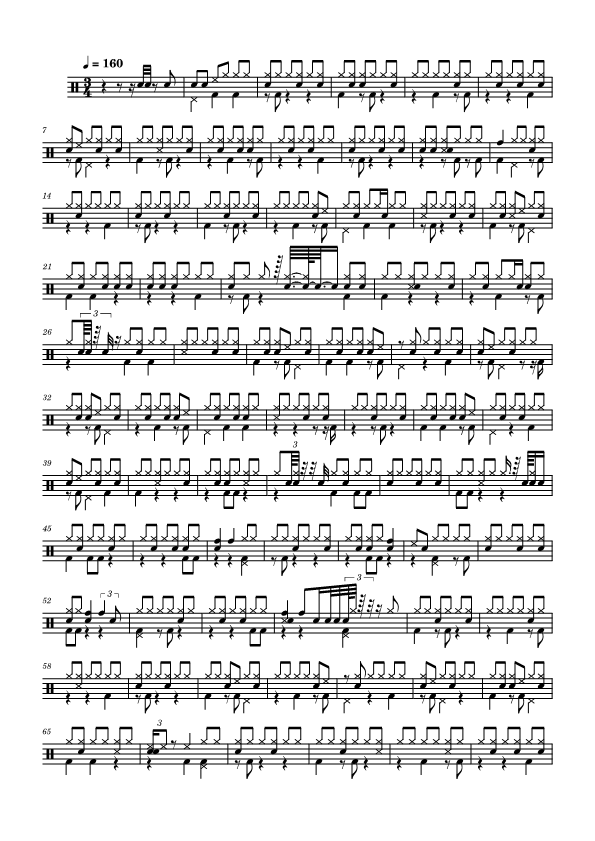 

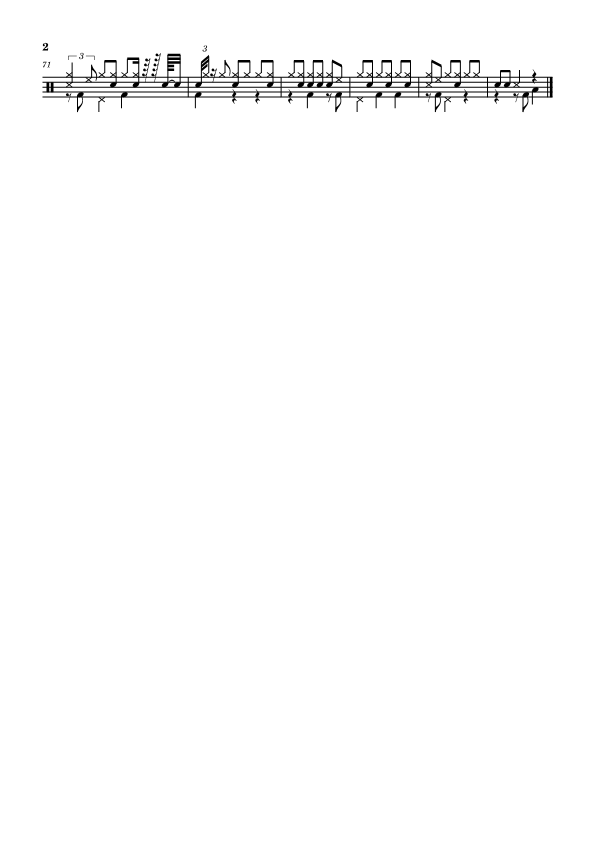 

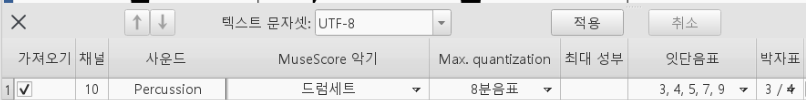 

- drummer1/session1/1_funk_80_beat_4-4.mid -> 악보 변환

## TFRecord 변환

### ✔️  TFRecord의 정보
> https://velog.io/@ghyeon1946/TFRecord-File
### ✔️  TFRecord를 사용하려는 이유

  1. **저장 용량의 감소**
  
  2. **속도의 증가**

  3. **관리의 용이**

In [10]:
# 데이터가 저장되어있는 경로
INPUT_DIRECTORY='/drive/MyDrive/pozalabs/magenta/magenta/train'

# TFRecord 파일은 binary data format으로 Protocol Buffer와 같음
SEQUENCES_TFRECORD='/drive/MyDrive/pozalabs/magenta/magenta/tmp/notesequences.tfrecord'

In [11]:
!python /drive/MyDrive/pozalabs/magenta/magenta/scripts/convert_dir_to_note_sequences.py --input_dir=$INPUT_DIRECTORY --output_file=$SEQUENCES_TFRECORD --recursive

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB thr

In [9]:
import tensorflow as tf

info_ = ["/drive/MyDrive/pozalabs/magenta/magenta/tmp/notesequences.tfrecord"]
raw_dataset = tf.data.TFRecordDataset(info_)
raw_dataset

for raw_record in raw_dataset.take(1):
    print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\n7/id/midi/train/badd642f90fa7fbb5063f8f1d66a60b6257e9127\x12/drummer1/session1/10_jazz-funk_116_fill_4-4.mid\x1a\x05train \xe0\x03*\x04\x10\x04\x18\x042\x00:\t\x11m\xb4\xcbd\x01\x00]@B\x18\x08&\x10`\x19I\x7f\xd4\xcb\x94{z?!A\xafRT\x10\x96\xbb?H\x01B\x18\x08,\x10>\x19&\x1d\x1c#\x10\x96\xcf?!fhs\xd3\x9dF\xd6?H\x01B\x18\x080\x10a\x19O\xdbu%\xb8\xa7\xd9?!\x11\xa9i\x17\xd3\x08\xe0?H\x01B\x18\x08.\x10\r\x19Ib\\\x84<\x8d\xda?!\x8e\xcfd\xff<\x8d\xe0?H\x01B\x18\x080\x10r\x19\x84n\x8a"\xff\xff\xe1?!m\x1b}\x03\xca=\xe5?H\x01B\x18\x08,\x10K\x19\xd6\x7f\xc31\xb8\xa7\xe8?!\xbf,\xb6\x12\x83\xe5\xeb?H\x01B\x18\x08&\x10[\x19\xb7?\xbcS\xa6\x11\xed?!PvW\x9a\xb8\'\xf0?H\x01B\x18\x08&\x10_\x19\x8cx\xfc(4\xc2\xf0?!A\xd6S\xab\xaf\\\xf2?H\x01B\x18\x08,\x10\\\x194\xc7\xa8!`9\xf4?!\xa9\x1d"\x92E\xd8\xf5?H\x01B\x18\x08+\x10[\x19\xe3\xc8^J\xb8\xa7\xf6?!\x98&\xb6\xcc3B\xf8?H\x01B\x18\x08+\x10]\x19\xd2\xb4z=N#\xf9?!G\x0b\xf4\xad3\xc2\xfa?H\x01B\x18\x08,\x10W\x19<p)BEX\x

## 학습

### ✔️  AutoEncoder

> https://velog.io/@ghyeon1946/Auto-Encoder

### ✔️  Variational AutoEncoder

> **Generative Model의 일종**

 - **VAE의 목적 : 확률 분포를 이용해 어떤 새로운 데이터를 생성**

 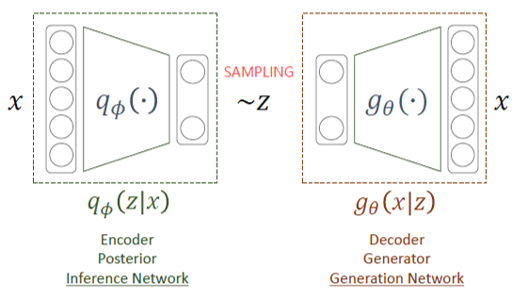

 - **Encoder** 
  1. 입력 데이터(x)를 이용해 latent vector를 뽑아내는데, latent vector는 **가우시안 분포**를 따른다고 가정하여 평균과 분산을 가짐
    - x를 q의 입력으로 주면서 x에 대한 이상적인 분포를
  2. 평균과 분산을 가지고 sampling을 통해 값을 뽑아냄 (z)

- **Decoder = (Generator)** 
  1. z를 이용하여 output 생성
  2. 입력 데이터(x)가 나올 확률 출력


### ✔️ MusicVAE

<img src="https://miro.medium.com/max/828/1*5Hx_2zTLXablceCOMpAP-g.png" width="400" height="300">

 - **RNN의 관한 정보와 stacked RNN, Bidirectional RNN 관한 정보**
 > https://velog.io/@ghyeon1946/10-RNN-GAN-zusflxfs

 - **Encoder** -> **Bidirectional Encoder**
    - 2계층 양방향 LSTM Network 사용
    - 두 계층은 연결 되어있으며, 두번째 LSTM 계층에서 구하고자 하는 양방향 벡터가 출력 (양방향으로 입력의 정보를 가지는 듯)
    - VAE의 특성 처럼 Encoder를 지나게 되면 평균과 표준편차가 구해짐

- **Decoder -> Hierarchical Decoder** 
  - 본래는  simple stacked RNN을 사용하였지만 기울기 손실 문제로 인해 결과가 좋지 않다는 것을 확인해서 Hierarchica RNN을 사용
  - Conductor에서는 임베딩 벡터 c의 시퀀스를 생성
  - RNN Decoder는 출력 토큰 대한 분포 시퀀스 생성
  - 만들어진 출력 토큰은 연결된 Conductor로부터 생성된 임베딩 벡터에서만 영향

In [ ]:
!python /drive/MyDrive/pozalabs/magenta/magenta/models/music_vae/music_vae_train.py --config=hierdec-trio_16bar --run_dir=/drive/MyDrive/pozalabs/magenta/magenta/tmp/music_vae --mode=train --examples_path=/drive/MyDrive/pozalabs/magenta/magenta/tmp/notesequences.tfrecord

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB thr

### 문제
 - 학습이 제대로 되지 않는 상황이 발생
  - 모델 checkpoint 한번 저장되면 학습 중단
  - 별다른 오류 메세지도 뜨지 않은 채 종료(C^)

> 나의 예상 : 학습이 진행되지 않는 것으로 보아 학습을 하는 부분에서 문제가 존재할 것으로 예상

 - 학습 python file의 tf_slim.training.train에 문제가 있는 것으로 보임
  - tf_slim의 경우 모델을 학습(기울기 계산, loss 계산, 모델 저장 등)의 역할을 하는데, 이 부분에서 문제가 있는 것으로 예상됨

## Log file

- 학습을 통해 생성된 log file 읽기

In [ ]:
!tensorboard --logdir=/drive/MyDrive/pozalabs/magenta/magenta/tmp/music_vae/train/


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.1 at http://localhost:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/jax/_src/dispatch.py", line 177, in wait_for_tokens
    @atexit.register
KeyboardInterrupt


## 평가

 - mode를 eval로 바꾸어 평가 mode 실행

In [ ]:
!python /drive/MyDrive/pozalabs/magenta/magenta/models/music_vae/music_vae_train.py --config=hierdec-trio_16bar --run_dir=/drive/MyDrive/pozalabs/magenta/magenta/tmp/music_vae --mode=eval --examples_path=/drive/MyDrive/pozalabs/magenta/magenta/tmp/notesequences.tfrecord

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB thr

## 생성

 - 학습된 모델을 이용하여 sample 생성

In [ ]:
!python /drive/MyDrive/pozalabs/magenta/magenta/models/music_vae/music_vae_generate.py --config=hierdec-trio_16bar --checkpoint_file=/drive/MyDrive/pozalabs/magenta/magenta/tmp/music_vae/train --mode=sample --num_outputs=5 --output_dir=/drive/MyDrive/pozalabs/magenta/magenta/tmp/music_vae/generated

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB thr